# Exploring Pokemon data for fun

In [204]:
#import stuff 
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier



In [2]:
# load the data 
pokemon_data = pd.read_csv("/Users/rithvik/Desktop/personal/code/Pokemon'/pokemon.csv")
pokemon_data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
#what does this tensor look like 
pokemon_data.shape

(801, 41)

In [4]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [5]:
pokemon_data.iloc[5]

abilities            ['Blaze', 'Solar Power']
against_bug                              0.25
against_dark                              1.0
against_dragon                            1.0
against_electric                          2.0
against_fairy                             0.5
against_fight                             0.5
against_fire                              0.5
against_flying                            1.0
against_ghost                             1.0
against_grass                            0.25
against_ground                            0.0
against_ice                               1.0
against_normal                            1.0
against_poison                            1.0
against_psychic                           1.0
against_rock                              4.0
against_steel                             0.5
against_water                             2.0
attack                                    104
base_egg_steps                           5120
base_happiness                    

In [6]:
pokemon_data.iloc[2]

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                       100
base_egg_steps      

# Some Classic EDA

What pokemon does this data contain?

In [7]:
i = 0
while i < 7:
    i+=1
    print(f'Generation {i}')
    print(pokemon_data[pokemon_data['generation'] == i].shape)
    print()

Generation 1
(151, 41)

Generation 2
(100, 41)

Generation 3
(135, 41)

Generation 4
(107, 41)

Generation 5
(156, 41)

Generation 6
(72, 41)

Generation 7
(80, 41)



In [8]:
single_type_7 = pokemon_data[(pokemon_data['generation'] == 7) & (pokemon_data['type2'].isna())]
single_type_7.shape


(29, 41)

In [9]:
#printing all the rows of legendary pokemon 
print(pokemon_data['is_legendary'].dtype)

int64


## Legendary vs Non legendary (switch up the pace a little)

In [10]:
#seperarting legendary pokemon 
lengendary_pokemon = pokemon_data[pokemon_data['is_legendary'] == 1]
print(lengendary_pokemon.shape)

# non legendary 
normal_pokemon = pokemon_data[pokemon_data['is_legendary'] == 0]
print(normal_pokemon.shape)

(70, 41)
(731, 41)


In [11]:
#normal pokemon EDA
normal_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [ ]:
#Some cleaning why not

#defining funtion to drop columns 
def drop_weakness(data):
    #drop all the weakness related columns 
    weakness = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']

    cleaned_data = data.drop(columns=weakness)
    return cleaned_data



In [13]:
# dropping weakness columns
normal_pokemon_cleaned = drop_weakness(normal_pokemon)
print(normal_pokemon_cleaned.shape)

lengendary_pokemon_cleaned = drop_weakness(lengendary_pokemon)
print(lengendary_pokemon_cleaned.shape)

(731, 23)
(70, 23)


In [14]:
normal_pokemon_cleaned.columns

Index(['abilities', 'attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'height_m', 'hp', 'japanese_name', 'name', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

Whats the varience is special attack and attack?


In [15]:
# finding the varience is power

print(normal_pokemon_cleaned['attack'].std())
print(normal_pokemon_cleaned['attack'].std())

print(lengendary_pokemon_cleaned['sp_attack'].std())
print(lengendary_pokemon_cleaned['attack'].std())

print(lengendary_pokemon_cleaned['attack'].max())
print(lengendary_pokemon_cleaned['name'][lengendary_pokemon_cleaned['attack'] == 29])

30.5768197710955
30.5768197710955
34.40358749168663
31.562698454780637
181
788     Cosmog
789    Cosmoem
Name: name, dtype: object


## Comparing power differences (and some other metrics)

In [16]:
# now lets see the mean 

print(f'Normal Pokemon:\n{normal_pokemon_cleaned.mean()}')
print()
print(f'Legendary Pokemon:\n{lengendary_pokemon_cleaned.mean()}')

Normal Pokemon:
attack               7.484131e+01
base_egg_steps       5.419425e+03
base_happiness       6.786594e+01
base_total           4.104815e+02
defense              7.048153e+01
experience_growth    1.037103e+06
height_m             1.055618e+00
hp                   6.642408e+01
percentage_male      5.506394e+01
pokedex_number       3.869193e+02
sp_attack            6.724077e+01
sp_defense           6.794528e+01
speed                6.354856e+01
weight_kg            4.800716e+01
generation           3.607387e+00
is_legendary         0.000000e+00
dtype: float64

Legendary Pokemon:
attack               1.093571e+02
base_egg_steps       2.569143e+04
base_happiness       3.921429e+01
base_total           6.152571e+02
capture_rate         4.762076e+86
defense              9.940000e+01
experience_growth    1.241851e+06
height_m             2.281159e+00
hp                   9.542857e+01
percentage_male      6.428571e+01
pokedex_number       5.480429e+02
sp_attack            1.137571e+

/var/folders/8b/s88jkrbj1mvfd3mw0qp8dllr0000gn/T/ipykernel_45998/134437766.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'Normal Pokemon:\n{normal_pokemon_cleaned.mean()}')
/var/folders/8b/s88jkrbj1mvfd3mw0qp8dllr0000gn/T/ipykernel_45998/134437766.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'Legendary Pokemon:\n{lengendary_pokemon_cleaned.mean()}')


In [17]:
sum_attack = lengendary_pokemon_cleaned['attack'].sum()
print(sum_attack/len(lengendary_pokemon_cleaned['attack']))



109.35714285714286


Whats the heaviest legendary and normal pokemon ?

In [18]:
#lightst legendary pokemon
lightest_index = lengendary_pokemon_cleaned['weight_kg'].idxmin()
name = lengendary_pokemon_cleaned.loc[lightest_index, 'name']
weight = lengendary_pokemon_cleaned.loc[lightest_index, 'weight_kg']

print(f"{name} is the lightest legendary Pokémon, weighing in at {weight} kg.")

#heaviest 
heaviest_index = lengendary_pokemon_cleaned['weight_kg'].idxmax()
name = lengendary_pokemon_cleaned.loc[heaviest_index, 'name']
weight = lengendary_pokemon_cleaned.loc[heaviest_index, 'weight_kg']

print(f"{name} is the heaviest legendary Pokémon, weighing in at {weight} kg.")


Cosmog is the lightest legendary Pokémon, weighing in at 0.1 kg.
Cosmoem is the heaviest legendary Pokémon, weighing in at 999.9 kg.


In [19]:
#printing the names of all the legendary pokemon 
legendary_names = lengendary_pokemon_cleaned['name'].tolist()
print(legendary_names)


['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-Oh', 'Celebi', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Cresselia', 'Manaphy', 'Darkrai', 'Shaymin', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Thundurus', 'Reshiram', 'Zekrom', 'Landorus', 'Kyurem', 'Keldeo', 'Meloetta', 'Genesect', 'Xerneas', 'Yveltal', 'Zygarde', 'Diancie', 'Hoopa', 'Volcanion', 'Tapu Koko', 'Tapu Lele', 'Tapu Bulu', 'Tapu Fini', 'Cosmog', 'Cosmoem', 'Solgaleo', 'Lunala', 'Nihilego', 'Buzzwole', 'Pheromosa', 'Xurkitree', 'Celesteela', 'Kartana', 'Guzzlord', 'Necrozma', 'Magearna']


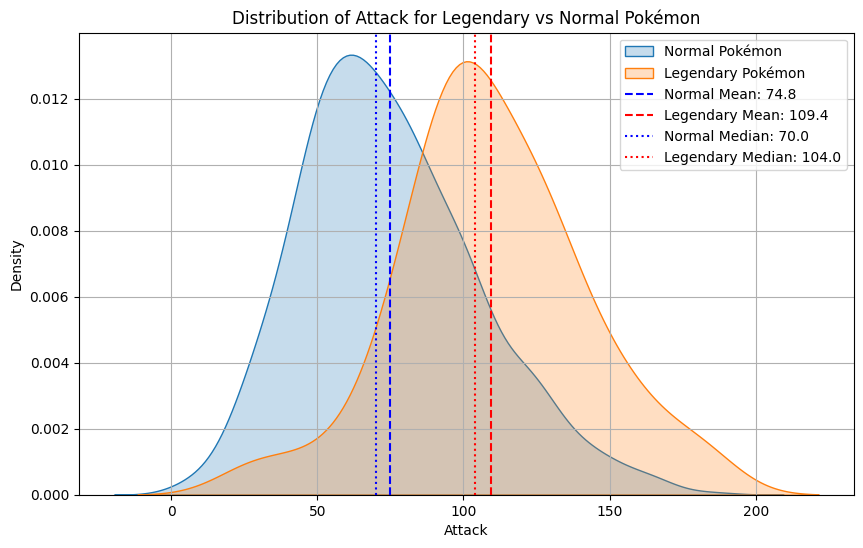

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))

# KDE plots
sns.kdeplot(normal_pokemon_cleaned['attack'], label='Normal Pokémon', fill=True)
sns.kdeplot(lengendary_pokemon_cleaned['attack'], label='Legendary Pokémon', fill=True)

# Calculate means and medians
normal_mean = normal_pokemon_cleaned['attack'].mean()
legendary_mean = lengendary_pokemon_cleaned['attack'].mean()
normal_median = normal_pokemon_cleaned['attack'].median()
legendary_median = lengendary_pokemon_cleaned['attack'].median()

# Plot mean lines
plt.axvline(normal_mean, color='blue', linestyle='--', label=f'Normal Mean: {normal_mean:.1f}')
plt.axvline(legendary_mean, color='red', linestyle='--', label=f'Legendary Mean: {legendary_mean:.1f}')

# Plot median lines
plt.axvline(normal_median, color='blue', linestyle=':', label=f'Normal Median: {normal_median:.1f}')
plt.axvline(legendary_median, color='red', linestyle=':', label=f'Legendary Median: {legendary_median:.1f}')

# Final touches
plt.xlabel('Attack')
plt.ylabel('Density')
plt.title('Distribution of Attack for Legendary vs Normal Pokémon')
plt.legend()
plt.grid(True)
plt.show()


I can imagine that this distribution was pretty intentional by The Pokemon Company.

In [21]:
print(lengendary_pokemon_cleaned['attack'].max())
print(normal_pokemon_cleaned['attack'].max())

181
185


What are the most powerful pokemon in both catagorys?

In [36]:
lengendary_pokemon_cleaned['base_total'].min()

200

In [60]:
strongest_legendary = lengendary_pokemon_cleaned[lengendary_pokemon_cleaned['base_total'] > 650]
strongest_legendary['name'].count()

23

In [61]:
print(strongest_legendary['name'])

149       Mewtwo
248        Lugia
249        Ho-Oh
379       Latias
380       Latios
381       Kyogre
382      Groudon
383     Rayquaza
482       Dialga
483       Palkia
485    Regigigas
486     Giratina
492       Arceus
642     Reshiram
643       Zekrom
645       Kyurem
715      Xerneas
716      Yveltal
717      Zygarde
718      Diancie
719        Hoopa
790     Solgaleo
791       Lunala
Name: name, dtype: object


In [62]:
print(strongest_legendary.loc[718])

abilities            ['Clear Body']
attack                          160
base_egg_steps                 6400
base_happiness                   70
base_total                      700
capture_rate                      3
classfication         Jewel Pokémon
defense                         110
experience_growth           1250000
height_m                        0.7
hp                               50
japanese_name         Diancieディアンシー
name                        Diancie
percentage_male                 NaN
pokedex_number                  719
sp_attack                       160
sp_defense                      110
speed                           110
type1                          rock
type2                         fairy
weight_kg                       8.8
generation                        6
is_legendary                      1
Name: 718, dtype: object


In [63]:
print(strongest_legendary[strongest_legendary['base_total'] == 780]['name'])

149      Mewtwo
383    Rayquaza
Name: name, dtype: object


In [64]:
normal_pokemon_cleaned['base_total'].describe()

count    731.000000
mean     410.481532
std      106.099143
min      180.000000
25%      317.000000
50%      418.000000
75%      494.000000
max      700.000000
Name: base_total, dtype: float64

In [79]:
strongest_normal_pokemon = normal_pokemon_cleaned[normal_pokemon_cleaned['base_total'] > 650]
strongest_normal_pokemon[['name','base_total']]

,name,base_total
247,Tyranitar,700
288,Slaking,670
372,Salamence,700
375,Metagross,700
444,Garchomp,700


In [80]:
strongest_legendary[['name','base_total']]

,name,base_total
149,Mewtwo,780
248,Lugia,680
249,Ho-Oh,680
379,Latias,700
380,Latios,700
381,Kyogre,770
382,Groudon,770
383,Rayquaza,780
482,Dialga,680
483,Palkia,680


In [102]:
lucario_index = normal_pokemon_cleaned[normal_pokemon_cleaned['name'] == 'Lucario'].index[0]
lucario_index

447

In [103]:
normal_pokemon_cleaned.loc[447]

abilities            ['Steadfast', 'Inner Focus', 'Justified']
attack                                                     145
base_egg_steps                                            6400
base_happiness                                              70
base_total                                                 625
capture_rate                                                45
classfication                                     Aura Pokémon
defense                                                     88
experience_growth                                      1059860
height_m                                                   1.2
hp                                                          70
japanese_name                                      Lucarioルカリオ
name                                                   Lucario
percentage_male                                           88.1
pokedex_number                                             448
sp_attack                                              

## Lets unconver why I didn't have the patience to hatch pokemon as a kid

what pokemon is the hardest to catch?

In [99]:
pokemon_data['base_egg_steps'].idxmax()

149

In [101]:
pokemon_data_cleaned = drop_weakness(pokemon_data)
pokemon_data_cleaned.head()

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [104]:
pokemon_data_cleaned['base_egg_steps'].describe()

count      801.000000
mean      7191.011236
std       6558.220422
min       1280.000000
25%       5120.000000
50%       5120.000000
75%       6400.000000
max      30720.000000
Name: base_egg_steps, dtype: float64

In [115]:
hardest_hatch_id = pokemon_data_cleaned['base_egg_steps'].idxmax()
hardest_hatch_id

149

In [116]:
pokemon_data_cleaned.loc[771]

abilities             ['Battle Armor']
attack                              95
base_egg_steps                   30720
base_happiness                       0
base_total                         534
capture_rate                         3
classfication        Synthetic Pokémon
defense                             95
experience_growth              1250000
height_m                           1.9
hp                                  95
japanese_name         Type: Nullタイプ：ヌル
name                        Type: Null
percentage_male                    NaN
pokedex_number                     772
sp_attack                           95
sp_defense                          95
speed                               59
type1                           normal
type2                              NaN
weight_kg                        120.5
generation                           7
is_legendary                         0
Name: 771, dtype: object

In [117]:
pokemon_data_cleaned.loc[149]

abilities            ['Pressure', 'Unnerve']
attack                                   150
base_egg_steps                         30720
base_happiness                             0
base_total                               780
capture_rate                               3
classfication                Genetic Pokémon
defense                                   70
experience_growth                    1250000
height_m                                 2.0
hp                                       106
japanese_name                    Mewtwoミュウツー
name                                  Mewtwo
percentage_male                          NaN
pokedex_number                           150
sp_attack                                194
sp_defense                               120
speed                                    140
type1                                psychic
type2                                    NaN
weight_kg                              122.0
generation                                 1
is_legenda

In [120]:
pokemon_data_cleaned.loc[771]

abilities             ['Battle Armor']
attack                              95
base_egg_steps                   30720
base_happiness                       0
base_total                         534
capture_rate                         3
classfication        Synthetic Pokémon
defense                             95
experience_growth              1250000
height_m                           1.9
hp                                  95
japanese_name         Type: Nullタイプ：ヌル
name                        Type: Null
percentage_male                    NaN
pokedex_number                     772
sp_attack                           95
sp_defense                          95
speed                               59
type1                           normal
type2                              NaN
weight_kg                        120.5
generation                           7
is_legendary                         0
Name: 771, dtype: object

In [121]:
hard_hatch_pokemon = pokemon_data_cleaned[pokemon_data_cleaned['base_egg_steps'] == 30720 ]


In [128]:
hard_hatch_pokemon['name']

149        Mewtwo
150           Mew
248         Lugia
249         Ho-Oh
250        Celebi
379        Latias
380        Latios
381        Kyogre
382       Groudon
383      Rayquaza
384       Jirachi
385        Deoxys
482        Dialga
483        Palkia
485     Regigigas
486      Giratina
487     Cresselia
490       Darkrai
491       Shaymin
492        Arceus
493       Victini
640      Tornadus
641     Thundurus
642      Reshiram
643        Zekrom
644      Landorus
645        Kyurem
647      Meloetta
648      Genesect
715       Xerneas
716       Yveltal
717       Zygarde
719         Hoopa
720     Volcanion
771    Type: Null
772      Silvally
788        Cosmog
789       Cosmoem
790      Solgaleo
791        Lunala
792      Nihilego
793      Buzzwole
794     Pheromosa
795     Xurkitree
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, dtype: object

In [131]:
high = normal_pokemon_cleaned['base_egg_steps'].max()

In [132]:
hardest = normal_pokemon_cleaned[normal_pokemon_cleaned['base_egg_steps'] == high ]

In [134]:
hardest['name']

771    Type: Null
772      Silvally
Name: name, dtype: object

In [135]:
hardest.loc[772]

abilities               ['RKS System']
attack                              95
base_egg_steps                   30720
base_happiness                       0
base_total                         570
capture_rate                         3
classfication        Synthetic Pokémon
defense                             95
experience_growth              1250000
height_m                           2.3
hp                                  95
japanese_name            Silvadyシルヴァディ
name                          Silvally
percentage_male                    NaN
pokedex_number                     773
sp_attack                           95
sp_defense                          95
speed                               95
type1                           normal
type2                              NaN
weight_kg                        100.5
generation                           7
is_legendary                         0
Name: 772, dtype: object

# Fun time's over lets really clean this data up

In [136]:
pokemon_data_cleaned.columns

Index(['abilities', 'attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'classfication', 'defense', 'experience_growth',
       'height_m', 'hp', 'japanese_name', 'name', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [140]:
def drop_trash(data):
    trash = ['abilities','base_egg_steps', 'base_happiness', 'classfication','japanese_name','percentage_male', 'name']
    cleaned_data = data.drop(columns=trash)
    return cleaned_data

pokemon_data_ml = drop_trash(pokemon_data_cleaned)
pokemon_data_ml.columns

Index(['attack', 'base_total', 'capture_rate', 'defense', 'experience_growth',
       'height_m', 'hp', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
       'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [ ]:
pokemon_data_ml[['type1','type2']]

,type1,type2
0,grass,poison
1,grass,poison
2,grass,poison
3,fire,NaN
4,fire,NaN
...,...,...
796,steel,flying
797,grass,steel
798,dark,dragon
799,psychic,NaN


In [ ]:
print(pokemon_data_ml.isnull().sum())



attack                 0
base_total             0
capture_rate           0
defense                0
experience_growth      0
height_m              20
hp                     0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0
dtype: int64


In [146]:
# filling in missing values 
cols = ['height_m', 'weight_kg']
for col in cols:
    pokemon_data_ml[col].fillna(pokemon_data_ml[col].mean(), inplace=True)
    
pokemon_data_ml['type2'].fillna(0, inplace=True)

#print to see if it worked 
print(pokemon_data_ml.isnull().sum())

attack               0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64


In [147]:
#one hot encoding for the types (I dont think it will matter much)
def one_hot_encode_types(data):
    return pd.get_dummies(data, columns=['type1', 'type2'], drop_first=False)

pokemon_data_ml_encoded = one_hot_encode_types(pokemon_data_ml)
pokemon_data_ml_encoded.head()


,attack,base_total,capture_rate,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,49,318,45,49,1059860,0.7,45,1,65,65,...,0,0,0,0,0,1,0,0,0,0
1,62,405,45,63,1059860,1.0,60,2,80,80,...,0,0,0,0,0,1,0,0,0,0
2,100,625,45,123,1059860,2.0,80,3,122,120,...,0,0,0,0,0,1,0,0,0,0
3,52,309,45,43,1059860,0.6,39,4,60,50,...,0,0,0,0,0,0,0,0,0,0
4,64,405,45,58,1059860,1.1,58,5,80,65,...,0,0,0,0,0,0,0,0,0,0


In [150]:
pokemon_data_ml_encoded.columns

Index(['attack', 'base_total', 'capture_rate', 'defense', 'experience_growth',
       'height_m', 'hp', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
       'weight_kg', 'generation', 'is_legendary', 'type1_bug', 'type1_dark',
       'type1_dragon', 'type1_electric', 'type1_fairy', 'type1_fighting',
       'type1_fire', 'type1_flying', 'type1_ghost', 'type1_grass',
       'type1_ground', 'type1_ice', 'type1_normal', 'type1_poison',
       'type1_psychic', 'type1_rock', 'type1_steel', 'type1_water', 'type2_0',
       'type2_bug', 'type2_dark', 'type2_dragon', 'type2_electric',
       'type2_fairy', 'type2_fighting', 'type2_fire', 'type2_flying',
       'type2_ghost', 'type2_grass', 'type2_ground', 'type2_ice',
       'type2_normal', 'type2_poison', 'type2_psychic', 'type2_rock',
       'type2_steel', 'type2_water'],
      dtype='object')

In [151]:
non_numeric_cols = pokemon_data_ml_encoded.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)


Index(['capture_rate'], dtype='object')


In [ ]:
print(pokemon_data_ml_encoded['capture_rate'].unique())


['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


In [153]:
pokemon_data_ml_encoded[pokemon_data_ml_encoded['capture_rate'] == '30 (Meteorite)255 (Core)']


,attack,base_total,capture_rate,defense,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
773,100,500,30 (Meteorite)255 (Core),60,1059860,0.3,60,774,100,60,...,0,0,0,0,0,0,0,0,0,0


In [154]:
#drop the row
pokemon_data_ml_encoded = pokemon_data_ml_encoded[pokemon_data_ml_encoded['capture_rate'] != '30 (Meteorite)255 (Core)']

#convert to int 
pokemon_data_ml_encoded['capture_rate'] = pd.to_numeric(pokemon_data_ml_encoded['capture_rate'])


/var/folders/8b/s88jkrbj1mvfd3mw0qp8dllr0000gn/T/ipykernel_45998/2270917645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_data_ml_encoded['capture_rate'] = pd.to_numeric(pokemon_data_ml_encoded['capture_rate'])


In [155]:
non_numeric_cols = pokemon_data_ml_encoded.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index([], dtype='object')


# Some Machine Learning, why not?

## Logestic Regression

In [157]:
X = pokemon_data_ml_encoded.drop('is_legendary', axis=1)
y = pokemon_data_ml_encoded['is_legendary']


In [159]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# defin the model object and fit the data 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [161]:
#Prediction and Eval 
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96875

Confusion Matrix:
 [[139   0]
 [  5  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       139
           1       1.00      0.76      0.86        21

    accuracy                           0.97       160
   macro avg       0.98      0.88      0.92       160
weighted avg       0.97      0.97      0.97       160



In [ ]:
# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

#Prediction and Eval 
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95

Confusion Matrix:
 [[137   2]
 [  6  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       139
           1       0.88      0.71      0.79        21

    accuracy                           0.95       160
   macro avg       0.92      0.85      0.88       160
weighted avg       0.95      0.95      0.95       160



### Lets now plot a decsion boundry in 2D space using capture rate and attack 

In [ ]:
# Pick two informative features (adjust these to your data)
feature_cols = ['capture_rate', 'attack']
X = pokemon_data_ml_encoded[feature_cols]
y = pokemon_data_ml_encoded['is_legendary']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression on 2D data
model = LogisticRegression()
model.fit(X_scaled, y)


LogisticRegression()

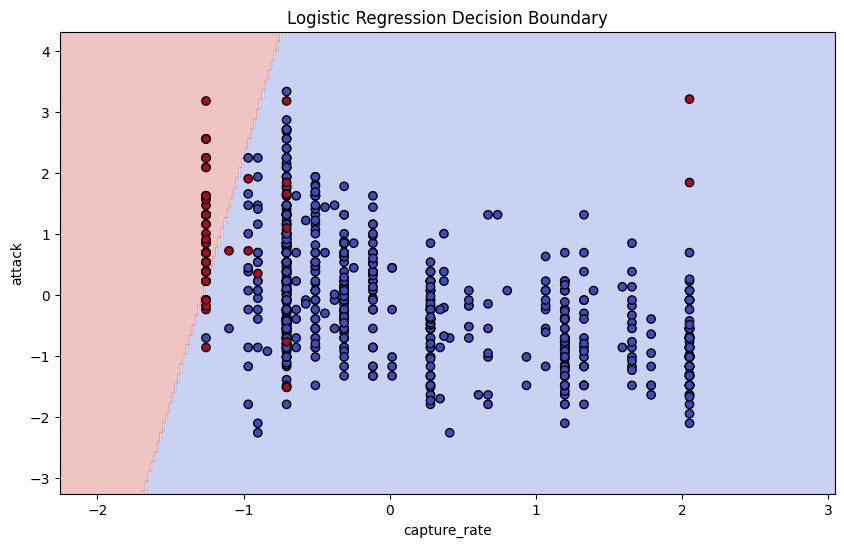

In [178]:
# Mesh grid for plotting
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel(feature_cols[0])
plt.ylabel(feature_cols[1])
plt.title("Logistic Regression Decision Boundary")
plt.show()


Lets dive deep and find these outliers, call me curious 

In [ ]:
# Redo scaling to access transformed values
X_raw = pokemon_data_ml_encoded[['capture_rate', 'attack']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Convert to DataFrame for easier querying
scaled_df = pd.DataFrame(X_scaled, columns=['capture_rate_scaled', 'attack_scaled'])
scaled_df['original_index'] = pokemon_data_ml_encoded.index

# Find outliers 
outliers = scaled_df[(scaled_df['capture_rate_scaled'] > 1.8) & (scaled_df['attack_scaled'] > 2.5)]
print(outliers)


     capture_rate_scaled  attack_scaled  original_index
796             2.050104       3.209092             797


In [180]:
outlier_indices = outliers['original_index'].values
print(pokemon_data_ml_encoded.loc[outlier_indices])

     attack  base_total  capture_rate  defense  experience_growth  height_m  \
797     181         570           255      131            1250000       0.3   

     hp  pokedex_number  sp_attack  sp_defense  ...  type2_ghost  type2_grass  \
797  59             798         59          31  ...            0            0   

     type2_ground  type2_ice  type2_normal  type2_poison  type2_psychic  \
797             0          0             0             0              0   

     type2_rock  type2_steel  type2_water  
797           0            1            0  

[1 rows x 51 columns]


In [184]:
pokemon_data_ml_encoded['is_legendary'].unique().sum()

1

I ended up googling these pokedex numbers and it looks like these 2 are Ultra Beasts or whatever that new stuff is 

# Neural net (Severe lack of data)

In [203]:
class OptimizedMLP(nn.Module):
    def __init__(self, input_dim):
        super(OptimizedMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)


In [186]:
# Define model
input_dim = X_train_tensor.shape[1]
model = OptimizedMLP(input_dim)

# Use BCEWithLogitsLoss (better numerically + works directly with logits)
criterion = nn.BCEWithLogitsLoss()

# AdamW helps with generalization
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)


In [198]:
num_epochs = 150
train_losses = []

for epoch in range(num_epochs):
    model.train()
    
    logits = model(X_train_tensor)
    loss = criterion(logits, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 10/150, Loss: 0.0000
Epoch 20/150, Loss: 0.0000
Epoch 30/150, Loss: 0.0000
Epoch 40/150, Loss: 0.0000
Epoch 50/150, Loss: 0.0000
Epoch 60/150, Loss: 0.0000
Epoch 70/150, Loss: 0.0000
Epoch 80/150, Loss: 0.0001
Epoch 90/150, Loss: 0.0000
Epoch 100/150, Loss: 0.0000
Epoch 110/150, Loss: 0.0001
Epoch 120/150, Loss: 0.0000
Epoch 130/150, Loss: 0.0000
Epoch 140/150, Loss: 0.0000
Epoch 150/150, Loss: 0.0001


In [199]:
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    predictions = torch.sigmoid(logits)
    predicted_labels = (predictions > 0.5).float()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))
print("Classification Report:\n", classification_report(y_test, predicted_labels))


Accuracy: 0.93125
Confusion Matrix:
 [[138   1]
 [ 10  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       139
           1       0.92      0.52      0.67        21

    accuracy                           0.93       160
   macro avg       0.92      0.76      0.81       160
weighted avg       0.93      0.93      0.92       160



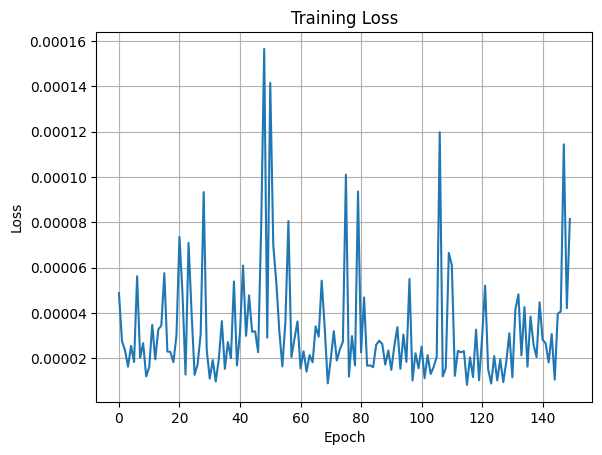

In [ ]:
# lets plot htis horrid loss 
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Logistic Regression won clearly

## Random Forest (the real hero)

📊 Accuracy: 0.98125

🧮 Confusion Matrix:
 [[139   0]
 [  3  18]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       139
           1       1.00      0.86      0.92        21

    accuracy                           0.98       160
   macro avg       0.99      0.93      0.96       160
weighted avg       0.98      0.98      0.98       160



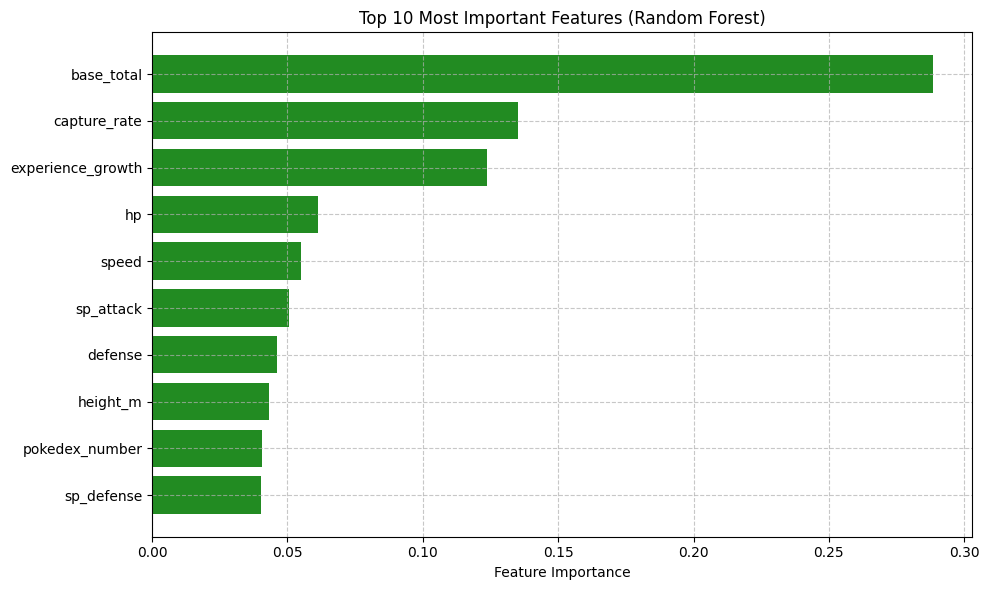

In [ ]:
#Split features and target
X = pokemon_data_ml_encoded.drop('is_legendary', axis=1)
y = pokemon_data_ml_encoded['is_legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Random Forest with class_weight to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

#Predict and Evaluate
y_pred = rf_model.predict(X_test)

print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))

#Visualize Feature Importances
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.xlabel("Feature Importance")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [202]:
# just to check overfitting 
train_acc = accuracy_score(y_train, rf_model.predict(X_train))
print("Training Accuracy:", train_acc)


Training Accuracy: 1.0


This is an example that clearly shows that entopy split or gini split (because we used sklearn) based learning is way cleaner than gradient based optimization methods. We just need more compute to use on scale, and maybe while we're at it find a soltuon for NP=Hard problems and then we'd all sleep easier lol.